In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [27]:
data = pd.read_csv("framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [28]:
# check for any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [29]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [30]:
# Let's fill all the null values by their mean value 
data["education"] = data["education"].fillna(data["education"].mean())
data["cigsPerDay"] = data["cigsPerDay"].fillna(data["cigsPerDay"].mean())
data["BPMeds"] = data["BPMeds"].fillna(data["BPMeds"].mean())
data["totChol"] = data["totChol"].fillna(data["totChol"].mean())
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())
data["heartRate"] = data["heartRate"].fillna(data["heartRate"].mean())
data["glucose"] = data["glucose"].fillna(data["glucose"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [31]:
X = np.asarray(data[["male","age", "education" , "currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]])
y = np.asarray(data['TenYearCHD'])


In [25]:
# By using scaler , scale the data so that it can be easily analyzed and better for gradient descent and backpropagation.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.15311332, -1.23428297,  2.00658417, ...,  0.28725796,
         0.34277523, -0.21742709],
       [-0.86721746, -0.41766419,  0.02041408, ...,  0.71966845,
         1.59043467, -0.26123092],
       [ 1.15311332, -0.18434454, -0.97267096, ..., -0.11321311,
        -0.07311125, -0.52405388],
       ...,
       [-0.86721746,  0.28229477,  0.02041408, ..., -1.06402482,
         0.34277523,  1.09668771],
       [ 1.15311332, -1.11762315,  1.01349912, ..., -0.04933429,
        -0.73852962, -0.43644623],
       [-0.86721746, -1.23428297,  1.01349912, ..., -1.20160997,
         0.75866171, -0.08601561]])

In [33]:
# split the data in two parts as train data and test data in 80% and 20% ratio 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)


In [35]:
# LogisticRegression
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [36]:
# Prediction 
y_pred = model.predict(X_test)

In [37]:
# check for the accuracy 
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8553459119496856
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1252
           1       0.06      0.60      0.12        20

    accuracy                           0.86      1272
   macro avg       0.53      0.73      0.52      1272
weighted avg       0.98      0.86      0.91      1272



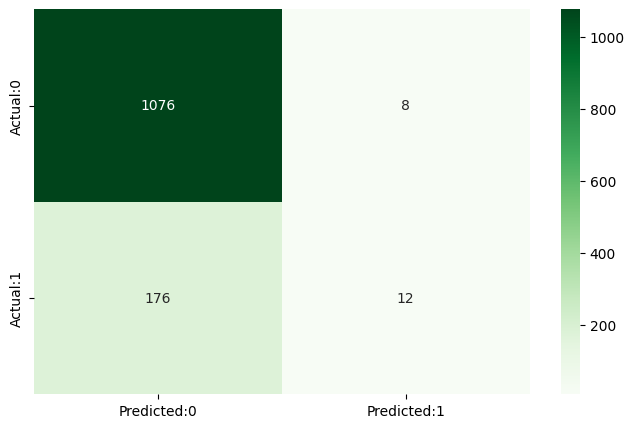

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.60      0.06      0.12       188

    accuracy                           0.86      1272
   macro avg       0.73      0.53      0.52      1272
weighted avg       0.82      0.86      0.80      1272



In [38]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

The above model which uses a logistic regression model has around 85-86% accuracy. So this model is pretty accurate to make predictions.

Let's try and implement SVM model and check for accuracy.

In [39]:
#Build the model
svm = SVC(kernel="rbf")
# Trained the model
svm.fit(X_train, y_train)
predict_y = svm.predict(X_test)
print(classification_report(predict_y,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1270
           1       0.01      0.50      0.01         2

    accuracy                           0.85      1272
   macro avg       0.50      0.68      0.47      1272
weighted avg       1.00      0.85      0.92      1272



This SVM model also has 85% accuracy same as logistic regression. So both models can be used for making accurate predictions.

Both the models have high accuracy but the f1-score in predicting 1 is very low meaning that both the models are not accurate in predicting the patients who have cardiac disease. However in predicting the patients who do not have cardiac disease, both models are almost 100% accurate.

Let's implement and check accuracy by using Random Forest Algorithm.

In [40]:
rfc = RandomForestClassifier(n_estimators = 500)  
 
rfc.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8490566037735849
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1252
           1       0.04      0.40      0.08        20

    accuracy                           0.85      1272
   macro avg       0.52      0.63      0.50      1272
weighted avg       0.97      0.85      0.90      1272



Random Forest Classifier also shows around the same results meaning that there is not any significant difference between the accuracy of these three models. And maybe using Logistic Regression for this problem might be a better choice to get more accurate results.

### Artificial Neural Network

In [53]:
# Dropout layer is used to avoid overfitting the model. It drops off half of the neurons i.e. set their values to zero.
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(64, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(32, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [54]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.7148 - loss: 14.1845 - val_accuracy: 0.8367 - val_loss: 4.2123
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7411 - loss: 5.2924 - val_accuracy: 0.8283 - val_loss: 0.5756
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.7015 - loss: 2.6227 - val_accuracy: 0.8367 - val_loss: 0.6844
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7444 - loss: 1.2904 - val_accuracy: 0.8367 - val_loss: 0.6710
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7860 - loss: 0.9206 - val_accuracy: 0.8367 - val_loss: 0.6377
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8004 - loss: 0.7774 - val_accuracy: 0.8384 - val_loss: 0.6120
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7859 - loss: 0.7341 - val_accuracy: 0.8384 - val_loss: 0.5924
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8120 - loss: 0.6836 - val_ac

In [55]:
ann.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

In [58]:
loss, accuracy = ann.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8368 - loss: 0.4392
Test Accuracy: 85.14%


### The artificial neural network (ANN) also gives about the same accuracy of 85-86% as all the other models that we have implemented above. 